In [1]:
import nltk
from nltk import tokenize
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
tknzr = TweetTokenizer()
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer

import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

import pandas as pd
import numbers

/Users/elenajia/anaconda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
import spacy
nlp = spacy.load('en')
from spacy.en import English
parser = English()

In [3]:
from spacy.symbols import nsubj, dobj, pobj, VERB
from spacy.symbols import *
import numpy as np

### test spacy on s_med_5000

In [4]:
df_s = pd.read_csv('bipolar_s_med_with_score_first5000.csv')

In [7]:
def labelMed(sent):
    doc = parser(sent)
    dictionary = {}
    
    for word in doc:
        dictionary[word.orth_] = word.dep_

    # print (dictionary)
    
    res = []
    
    for key, value in dictionary.items():
        if "medicine" in key:
            res.append(value)
        if "medication" in key:
            res.append(value)
        if "meds" in key:
            res.append(value)
    
    return '_'.join(res)        
#     return res
    
    # print (res)
    # return dictionary
        
    # if wor.dep == nsubj and possible_subject.head.pos == VERB:
    # verbs.add(possible_subject.head)

In [8]:
test =  "I'm against taking medication after what I had to deal with in the past but I realized this is my only option to get better."
labelMed(test)

'dobj'

In [9]:
# df_s

In [10]:
df_s['dict'] = df_s['sentence'].map(lambda x: labelMed(x))

In [11]:
# df_s

In [12]:
def select_nubj_or_obj_or_other(label_list):
    if 'nsubj' in label_list:
        return 1
    elif 'pobj' in label_list or 'dobj' in label_list or 'iobj' in label_list:
        return -1
    else:
        return 0

In [13]:
df_s['identifier'] = df_s['dict'].map(lambda x: select_nubj_or_obj_or_other(x))

In [43]:
df_s['sentiment'] = df_s[['pos_vader', 'neu_vader', 'neg_vader']].idxmax(axis=1)
df_s['only pos or neg'] = df_s[['pos_vader', 'neg_vader']].idxmax(axis=1)

In [44]:
df_s[['sentence','sentiment']].groupby('sentiment').count()

,sentence
sentiment,
neg_vader,23
neu_vader,4962
pos_vader,15


In [45]:
df_s[['sentence','only pos or neg']].groupby('only pos or neg').count()

,sentence
only pos or neg,
neg_vader,1885
pos_vader,3115


## Analysis

In [16]:
df_s.dict.unique()

array(['dobj', 'pobj', 'conj', 'compound', 'nsubj', 'dobj_dobj',
       'pobj_dobj', 'npadvmod', 'pobj_pobj', 'appos', 'attr', 'nummod',
       'ROOT', 'amod', 'nsubj_pobj', 'advmod', 'nsubj_nsubj', 'punct',
       'ccomp', 'dobj_pobj', 'nsubj_conj', 'dobj_nsubj', 'pobj_conj',
       'pobj_nsubj', 'nsubjpass', 'poss', 'aux', 'dobj_parataxis',
       'nsubj_attr', 'dep', 'npadvmod_pobj', 'pobj_dobj_pobj', 'dobj_conj',
       'advmod_dobj', 'dobj_parataxis_pobj', 'advcl', 'acomp', 'nmod',
       'pobj_amod', 'nummod_pobj_compound', 'compound_pobj', 'conj_dobj',
       'oprd', 'compound_npadvmod', 'relcl', 'attr_dobj', 'pobj_compound',
       'pobj_attr', 'pcomp', 'dep_npadvmod', 'dative', 'nsubjpass_attr',
       'attr_pobj'], dtype=object)

In [17]:
from collections import Counter

Counter(df_s.dict).most_common(10)

[('pobj', 2053),
 ('dobj', 1665),
 ('nsubj', 576),
 ('conj', 187),
 ('compound', 135),
 ('attr', 96),
 ('npadvmod', 40),
 ('nsubjpass', 34),
 ('ROOT', 31),
 ('pobj_pobj', 22)]

In [18]:
df_s_nsubj = df_s[df_s['identifier'] == 1]
df_s_nsubj.to_csv('bipolar_s_med_5000_nsubj.csv')

In [19]:
df_s_obj = df_s[df_s['identifier'] == -1]
df_s_obj.to_csv('bipolar_s_med_5000_obj.csv')

df_s_other = df_s[df_s['identifier'] == 0]
df_s_other.to_csv('bipolar_s_med_5000_other.csv')

In [20]:
def print_score_row(df):
    
    for i in df.index:
        ts = df[df.index==i]
        print( ts[['pos_vader', 'neu_vader', 'neg_vader']])
        print( ts['sentence'].values[0])
    
def returnmost(dataframe, pos):
    pospeech_df = dataframe[dataframe['dict'] == pos][['Unnamed: 0','pos_vader', 'neu_vader', 'neg_vader', 'sentence']]
    pospeech_df = pospeech_df.reset_index(drop=True)
#     print(pospeech_df)
#     print(pospeech_df.sort_values('pos_vader', ascending=False)[:5])
    # Most pos
    print('========== MOST POSITIVE ========== ')
    print_score_row(pospeech_df.sort_values('pos_vader', ascending=False)[:5])
    
    # most neu
    print('========== MOST NEUTRAL ========== ')
    print_score_row(pospeech_df.sort_values('neu_vader', ascending=False)[:5])
    
    # most neg
    print('========== MOST negative ========== ')
    print_score_row(pospeech_df.sort_values('neg_vader', ascending=False)[:5])
    
    # random sample
    ind = np.argsort(np.random.rand(pospeech_df.shape[0]))
    print('========== RANDOM SAMPLE ========== ')
    print_score_row(pospeech_df[[x in ind[:10] for x in pospeech_df.index]])

In [21]:
returnmost(df_s, 'conj')

========== MOST POSITIVE ========== 
   pos_vader  neu_vader  neg_vader
1      0.361      0.639        0.0
Hopefully a good pdoc and proper meds will help but I can't wait for that.
     pos_vader  neu_vader  neg_vader
178      0.342      0.658        0.0
The past two years have been a huge journey of acceptance, proper medication, recovery, and stability and then POOF, this wonderful dream girl shows up in my life!
    pos_vader  neu_vader  neg_vader
16      0.321      0.679        0.0
Today, as a student in a PhD program, I am feeling wonderful with therapy and medication.
     pos_vader  neu_vader  neg_vader
128      0.288      0.649      0.063
Well, after an incredibly difficult year of finally seeking treatment, mood episodes, ups and downs, new medications and all out just feeling mental, I am so proud to have been accepted into my chosen Honours Program.
     pos_vader  neu_vader  neg_vader
184      0.285      0.715        0.0
Doing very well with CBT and medication.
========== 

In [22]:
df_s

,Unnamed: 0,neg_prob,pos_prob,neg_vader,neu_vader,pos_vader,sentence,dict,identifier,sentiment
0,0,0.984976,0.015024,0.000,1.000,0.000,I've taken Bupropion XL 250mg over a year ago ...,dobj,-1,neu_vader
1,1,0.999745,0.000255,0.000,1.000,0.000,He is on medication 3 times a day.,pobj,-1,neu_vader
2,2,0.999384,0.000616,0.000,1.000,0.000,I just got a job today and I'm being readmitte...,dobj,-1,neu_vader
3,3,0.999981,0.000019,0.000,1.000,0.000,These episodes could be very extreme so she (t...,conj,0,neu_vader
4,4,0.996056,0.003944,0.000,1.000,0.000,I keep getting asked what my goal for treatmen...,compound,0,neu_vader
5,5,0.999900,0.000100,0.000,0.878,0.122,Do they try different meds on you in rapid suc...,dobj,-1,neu_vader
6,6,0.999735,0.000265,0.000,0.874,0.126,I have *not* found an acceptable medication re...,compound,0,neu_vader
7,7,0.999851,0.000149,0.125,0.875,0.000,"Now I'm stuck living with my parents, going to...",dobj,-1,neu_vader
8,8,0.999908,0.000092,0.000,1.000,0.000,"She's on medication, but doesn't always take i...",pobj,-1,neu_vader
9,9,0.998154,0.001846,0.000,1.000,0.000,So I've taken a lot of meds.,pobj,-1,neu_vader


In [23]:
## maybe look closer at SA

In [24]:
df_s_nsubj

,Unnamed: 0,neg_prob,pos_prob,neg_vader,neu_vader,pos_vader,sentence,dict,identifier,sentiment
10,10,0.999938,0.000062,0.073,0.809,0.118,Only meds that have worked for me so far have ...,nsubj,1,neu_vader
13,13,0.999325,0.000675,0.099,0.755,0.145,"My medications are affordable, I can see a doc...",nsubj,1,neu_vader
16,16,0.995678,0.004322,0.079,0.921,0.000,"After a year of therapy, my therapist has advi...",nsubj,1,neu_vader
18,18,0.999829,0.000171,0.000,1.000,0.000,"She said I will only see him once, I will not ...",nsubj,1,neu_vader
19,19,0.999967,0.000033,0.000,1.000,0.000,My meds aren't working.,nsubj,1,neu_vader
20,20,0.999843,0.000157,0.292,0.708,0.000,I'm depressed again and the meds aren't workin...,nsubj,1,neu_vader
24,24,0.984244,0.015756,0.000,1.000,0.000,"I have seen a variety of doctors, all the medi...",nsubj,1,neu_vader
53,53,0.999983,0.000017,0.000,1.000,0.000,I'm thinking if my meds don't kick in by late ...,nsubj,1,neu_vader
58,58,0.999939,0.000061,0.170,0.830,0.000,"So, this is why I don't understand why the med...",nsubj,1,neu_vader
59,59,0.999225,0.000775,0.000,0.670,0.330,If I'm productive and happy and finally stable...,nsubj,1,neu_vader


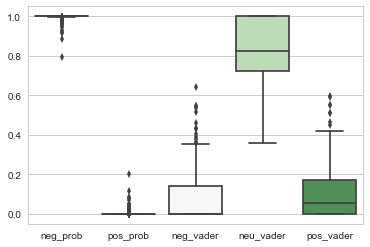

In [25]:
ax2 = sns.boxplot(data = df_s_nsubj.loc[:,['neg_prob','pos_prob','neg_vader','neu_vader','pos_vader']], palette = "PRGn")

In [26]:
df_s_obj

,Unnamed: 0,neg_prob,pos_prob,neg_vader,neu_vader,pos_vader,sentence,dict,identifier,sentiment
0,0,0.984976,0.015024,0.000,1.000,0.000,I've taken Bupropion XL 250mg over a year ago ...,dobj,-1,neu_vader
1,1,0.999745,0.000255,0.000,1.000,0.000,He is on medication 3 times a day.,pobj,-1,neu_vader
2,2,0.999384,0.000616,0.000,1.000,0.000,I just got a job today and I'm being readmitte...,dobj,-1,neu_vader
5,5,0.999900,0.000100,0.000,0.878,0.122,Do they try different meds on you in rapid suc...,dobj,-1,neu_vader
7,7,0.999851,0.000149,0.125,0.875,0.000,"Now I'm stuck living with my parents, going to...",dobj,-1,neu_vader
8,8,0.999908,0.000092,0.000,1.000,0.000,"She's on medication, but doesn't always take i...",pobj,-1,neu_vader
9,9,0.998154,0.001846,0.000,1.000,0.000,So I've taken a lot of meds.,pobj,-1,neu_vader
11,11,0.998584,0.001416,0.181,0.713,0.106,My dad eventually forced me off the drug becau...,dobj,-1,neu_vader
12,12,0.999157,0.000843,0.000,0.923,0.077,I have a mental health nurse that visits me ev...,pobj,-1,neu_vader
15,15,0.999778,0.000222,0.000,0.733,0.267,"So please, if you feel like you are doing grea...",dobj,-1,neu_vader


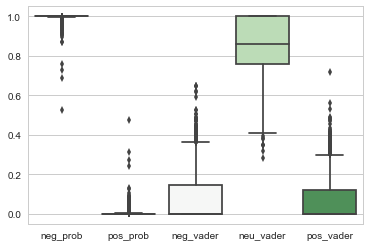

In [27]:
ax2 = sns.boxplot(data = df_s_obj.loc[:,['neg_prob','pos_prob','neg_vader','neu_vader','pos_vader']], palette = "PRGn")

In [28]:
df_s_other

,Unnamed: 0,neg_prob,pos_prob,neg_vader,neu_vader,pos_vader,sentence,dict,identifier,sentiment
3,3,0.999981,0.000019,0.000,1.000,0.000,These episodes could be very extreme so she (t...,conj,0,neu_vader
4,4,0.996056,0.003944,0.000,1.000,0.000,I keep getting asked what my goal for treatmen...,compound,0,neu_vader
6,6,0.999735,0.000265,0.000,0.874,0.126,I have *not* found an acceptable medication re...,compound,0,neu_vader
14,14,0.997941,0.002059,0.047,0.866,0.087,I think giving blood reduced my medications le...,compound,0,neu_vader
22,22,0.997586,0.002414,0.000,1.000,0.000,I know I need to talk to a psychiatrist about ...,compound,0,neu_vader
30,30,0.999172,0.000828,0.000,0.639,0.361,Hopefully a good pdoc and proper meds will hel...,conj,0,neu_vader
32,32,0.999991,0.000009,0.000,1.000,0.000,Could this actually be medicine-related?,npadvmod,0,neu_vader
37,37,0.997762,0.002238,0.042,0.958,0.000,"I've had ADHD most of my life, and I've manage...",conj,0,neu_vader
38,38,0.999977,0.000023,0.000,1.000,0.000,"So I am hypomanic, been seeing my psychiatrist...",conj,0,neu_vader
56,56,0.999393,0.000607,0.189,0.658,0.153,And what do I even say when I get to the hospi...,compound,0,neu_vader


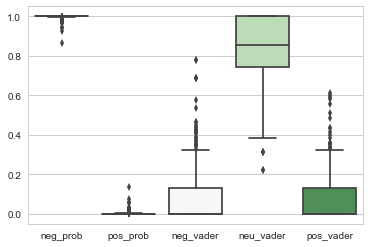

In [46]:
ax2 = sns.boxplot(data = df_s_other.loc[:,['neg_prob','pos_prob','neg_vader','neu_vader','pos_vader']], palette = "PRGn")

### spacy: posts_5000 identify

In [47]:
df_p = pd.read_csv('bipolar_p_med_with_score_first5000.csv')

In [32]:
def labelMed2(post):
    post = str(post)
    
    doc = parser(post)
    dictionary = {}
    
    for word in doc:
        dictionary[word.orth_] = word.dep_

    # print (dictionary)
    
    res = []
    
    for key, value in dictionary.items():
        if "medicine" in key:
            res.append(value)
        if "medication" in key:
            res.append(value)
        if "meds" in key:
            res.append(value)
            
    return res

In [33]:
df_p['dict'] = df_p['post'].map(lambda x: labelMed2(x))

In [34]:
df_p['identifier'] = df_p['dict'].map(lambda x: select_nubj_or_obj_or_other(x))

In [35]:
df_p['sentiment'] = df_p[['pos_vader', 'neu_vader', 'neg_vader']].idxmax(axis=1)

In [36]:
df_p

,Unnamed: 0,neg_prob,pos_prob,neg_vader,neu_vader,pos_vader,post,dict,identifier,sentiment
0,0,0.846326,0.153674,0.101,0.786,0.113,I currently take Depakote 500mg for rapid cycl...,[dobj],-1,neu_vader
1,1,0.996557,0.003443,0.078,0.841,0.082,"I'm helping a friend babysit her son, who is 1...",[pobj],-1,neu_vader
2,2,0.002570,0.997430,0.083,0.838,0.078,I'm not even sure what I'm hoping to get out o...,[dobj],-1,neu_vader
3,3,0.211912,0.788088,0.124,0.736,0.140,Looking for some advice or perhaps just unders...,[conj],0,neu_vader
4,4,0.010471,0.989529,0.117,0.746,0.137,Well here is some background on me http://www....,[compound],0,neu_vader
5,5,0.917864,0.082136,0.199,0.703,0.098,**TL;DR:** I know I need to escalate my treatm...,"[dobj, compound]",-1,neu_vader
6,6,0.970178,0.029822,0.141,0.740,0.119,I've been unemployed for the better part of 5 ...,[dobj],-1,neu_vader
7,7,0.834821,0.165179,0.162,0.693,0.145,She's an... odd girl. I'm not sure how much is...,[pobj],-1,neu_vader
8,8,0.994367,0.005633,0.121,0.836,0.043,"So I've taken a lot of meds. SSRI's, SNRI's, ...",[nsubj],1,neu_vader
9,9,0.974387,0.025613,0.130,0.825,0.045,I was so sure I was Bipolar. I speculated unti...,[dobj],-1,neu_vader


In [37]:
df_p_nsubj = df_p[df_p['identifier'] == 1]
df_p_nsubj.to_csv('bipoar_p_med_5000_nsubj.csv')

df_p_obj = df_p[df_p['identifier'] == -1]
df_p_obj.to_csv('bipolar_p_med_5000_obj.csv')

df_p_other = df_p[df_p['identifier'] == 0]
df_p_other.to_csv('bipolar_p_med_5000_other.csv')

In [38]:
df_p_nsubj

,Unnamed: 0,neg_prob,pos_prob,neg_vader,neu_vader,pos_vader,post,dict,identifier,sentiment
9,9,0.132913,0.867087,0.085,0.786,0.128,I have a nearly impossible time saying no to a...,[nsubj],1,neu_vader
10,10,0.999156,0.000844,0.121,0.808,0.071,I've been working with my doctor over the past...,"[dobj, dobj, nsubj]",1,neu_vader
11,11,0.039714,0.960286,0.160,0.723,0.117,"**Actual experiences with meds will be quoted,...","[pobj, nsubj]",1,neu_vader
63,63,0.999172,0.000828,0.205,0.765,0.030,"I don't know what to do. I'm live in the UK, a...",[nsubj],1,neu_vader
64,64,0.662993,0.337007,0.084,0.808,0.108,I've finally taken the first step to overcomin...,[nsubj],1,neu_vader
68,68,0.971667,0.028333,0.127,0.739,0.134,Last year I entered college out of state. I ha...,[nsubj],1,neu_vader
74,74,0.995452,0.004548,0.060,0.910,0.030,So I work full time and my job pays very littl...,"[pobj, nsubj]",1,neu_vader
78,78,0.001297,0.998703,0.226,0.676,0.097,This is my first reddit post ever. I've hardly...,"[dobj, nsubj]",1,neu_vader
79,79,0.995665,0.004335,0.118,0.789,0.093,"Hello, I really need some help.\n\nMy mother i...",[nsubj],1,neu_vader
101,101,0.979066,0.020934,0.114,0.759,0.127,So I have SEVERE anxiety. To the point where I...,"[pobj, nsubj]",1,neu_vader


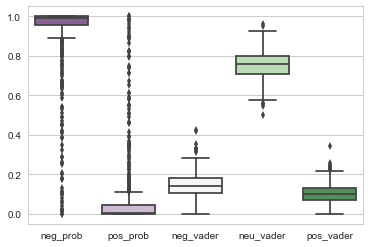

In [39]:
ax1 = sns.boxplot(data = df_p_nsubj.loc[:,['neg_prob','pos_prob','neg_vader','neu_vader','pos_vader']], palette = "PRGn")

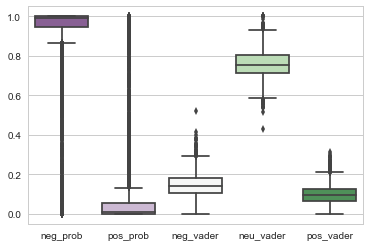

In [40]:
ax2 = sns.boxplot(data = df_p_obj.loc[:,['neg_prob','pos_prob','neg_vader','neu_vader','pos_vader']], palette = "PRGn")

In [41]:
df_p_obj

,Unnamed: 0,neg_prob,pos_prob,neg_vader,neu_vader,pos_vader,post,dict,identifier,sentiment
1,1,0.994773,0.005227,0.204,0.708,0.088,I'm not sure where to start. I've been lurking...,[dobj],-1,neu_vader
2,2,0.997802,0.002198,0.263,0.688,0.049,I'm a 23 year old female and I've been battlin...,"[dobj, pobj]",-1,neu_vader
3,3,0.928401,0.071599,0.164,0.730,0.106,"A bit of a strange question, I suppose, but he...",[pobj],-1,neu_vader
4,4,0.999992,0.000008,0.000,0.950,0.050,Has anyone ever had this experience that nothi...,[pobj],-1,neu_vader
5,5,0.997977,0.002023,0.209,0.754,0.038,"To start, I'm using a throwaway/anonymous acco...",[dobj],-1,neu_vader
6,6,0.997678,0.002322,0.092,0.808,0.100,I've always what I'd consider moderate anxiety...,[dobj],-1,neu_vader
12,12,0.993021,0.006979,0.153,0.787,0.060,I am a 19 year old female diagnosed with a GAD...,[dobj],-1,neu_vader
13,13,0.999615,0.000385,0.273,0.596,0.130,Have been having difficulty breathing and ches...,[pobj],-1,neu_vader
15,15,0.661465,0.338535,0.137,0.775,0.089,I am in desperate need of some help... and I n...,"[pobj, pobj]",-1,neu_vader
16,16,0.666711,0.333289,0.168,0.719,0.113,I think I need to pour this out in one place. ...,[pobj],-1,neu_vader


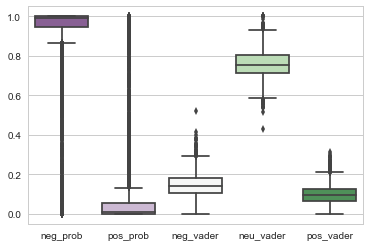

In [42]:
ax2 = sns.boxplot(data = df_p_obj.loc[:,['neg_prob','pos_prob','neg_vader','neu_vader','pos_vader']], palette = "PRGn")

In [43]:
df_p_other

,Unnamed: 0,neg_prob,pos_prob,neg_vader,neu_vader,pos_vader,post,dict,identifier,sentiment
0,0,0.987449,0.012551,0.156,0.771,0.073,Second day on drugs and it has already started...,[compound],0,neu_vader
7,7,0.998581,0.001419,0.109,0.696,0.195,Hey everyone. I've been lurking here for aroun...,[conj],0,neu_vader
8,8,0.117632,0.882368,0.200,0.714,0.086,"I have GAD, I have had many anxieties come and...",[conj],0,neu_vader
14,14,0.658450,0.341550,0.088,0.856,0.057,"I do not have depression or anxiety, I have ne...",[compound],0,neu_vader
18,18,0.999156,0.000844,0.081,0.778,0.141,"Hey guys,\n\nI just got prescribed new meds Le...",[compound],0,neu_vader
27,27,0.970572,0.029428,0.220,0.702,0.078,I spent my morning in the ER today because I w...,[conj],0,neu_vader
35,35,0.504630,0.495370,0.132,0.772,0.096,"Hi, I stumbled upon this group searching for s...","[ROOT, ROOT]",0,neu_vader
41,41,0.999640,0.000360,0.106,0.774,0.120,Iama long long time lurker who finally found t...,[nsubjpass],0,neu_vader
51,51,0.989934,0.010066,0.092,0.792,0.116,"During my last appointment with my doctor, he ...",[dep],0,neu_vader
53,53,0.332508,0.667492,0.118,0.708,0.175,Ok so for a couple of years maybe I feel like ...,[conj],0,neu_vader


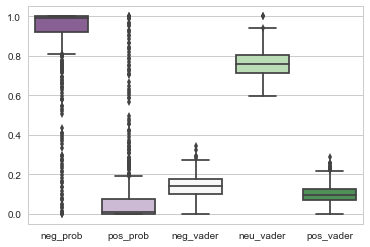

In [44]:
ax = sns.boxplot(data = df_p_other.loc[:,['neg_prob','pos_prob','neg_vader','neu_vader','pos_vader']], palette = "PRGn")